In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

In [59]:
file_2023 = '/content/drive/MyDrive/Projeto2/Data/DoencasDePelePorRaca_2023.csv'
file_2022 = '/content/drive/MyDrive/Projeto2/Data/DoencasDePelePorRaca_2022.csv'
file_2021 = '/content/drive/MyDrive/Projeto2/Data/DoencasDePelePorRaca_2021.csv'

In [60]:
#função para carregar e filtrar os dados
def load_and_filter_data(file_path, year):
    df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';', skiprows=3)
    df = df[df['Categoria CID-10'] == 'C43   Melanoma malig da pele']
    df['Ano'] = year  #adiciona uma coluna de ano
    return df

In [61]:
#carrega os dados de cada ano
df_2023 = load_and_filter_data(file_2023, 2023)
df_2022 = load_and_filter_data(file_2022, 2022)
df_2021 = load_and_filter_data(file_2021, 2021)

In [62]:
df_combined = pd.concat([df_2023, df_2022, df_2021], ignore_index=True)

In [63]:
df_combined.head()

,Categoria CID-10,Branca,Preta,Amarela,Parda,Indígena,Ignorado,Total,Ano
0,C43 Melanoma malig da pele,1599,49,7,359,1,32,2047.0,2023
1,C43 Melanoma malig da pele,1576,45,6,307,-,25,1959.0,2022
2,C43 Melanoma malig da pele,1424,42,5,316,-,45,1832.0,2021


In [64]:
df_combined.drop(df_combined[df_combined['Categoria CID-10'] != 'C43   Melanoma malig da pele'].index, inplace=True)

df_combined.head()

,Categoria CID-10,Branca,Preta,Amarela,Parda,Indígena,Ignorado,Total,Ano
0,C43 Melanoma malig da pele,1599,49,7,359,1,32,2047.0,2023
1,C43 Melanoma malig da pele,1576,45,6,307,-,25,1959.0,2022
2,C43 Melanoma malig da pele,1424,42,5,316,-,45,1832.0,2021


In [ ]:
df_combined.info() #inspeciona o tipo de dado

In [ ]:
df_combined.describe() #resumo estatístico

In [ ]:
df_combined.isnull().sum() #verifica valores ausentes ou inconcistentes

In [ ]:
sns.countplot(data=df_combined, x='Ano')
plt.title('Distribuição de Casos por Ano')
plt.show()

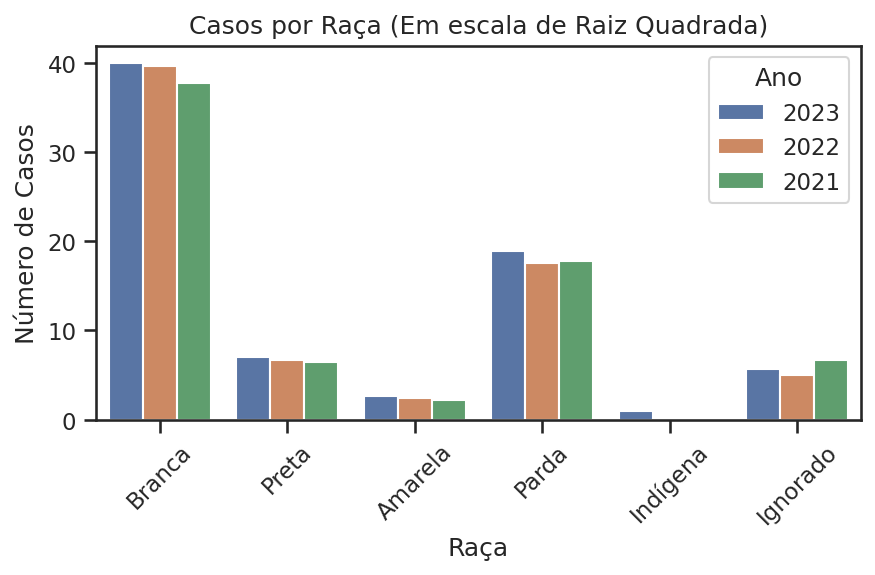

In [94]:
#transforma os dados para o formato longo
df_long = pd.melt(
    df_combined,
    id_vars=["Ano", "Categoria CID-10"],
    value_vars=["Branca", "Preta", "Amarela", "Parda", "Indígena", "Ignorado"],
    var_name="Raça",
    value_name="Casos"
)

#converte a coluna "Casos" para números, forçando erros a serem tratados como NaN
df_long["Casos"] = pd.to_numeric(df_long["Casos"], errors="coerce")

#certifica de que os valores sejam positivos
df_long["Casos Ajustados"] = np.sqrt(df_long["Casos"])  #deixa em raiz quadrado para ser mais fácil de ver

plt.figure(figsize=(6, 4))

#cria o gráfico com valores ajustados
sns.barplot(data=df_long, x="Raça", y="Casos Ajustados", errorbar=None, hue="Ano")
plt.title("Casos por Raça (Em escala de Raiz Quadrada)")
plt.xlabel("Raça")
plt.ylabel("Número de Casos")
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.show()

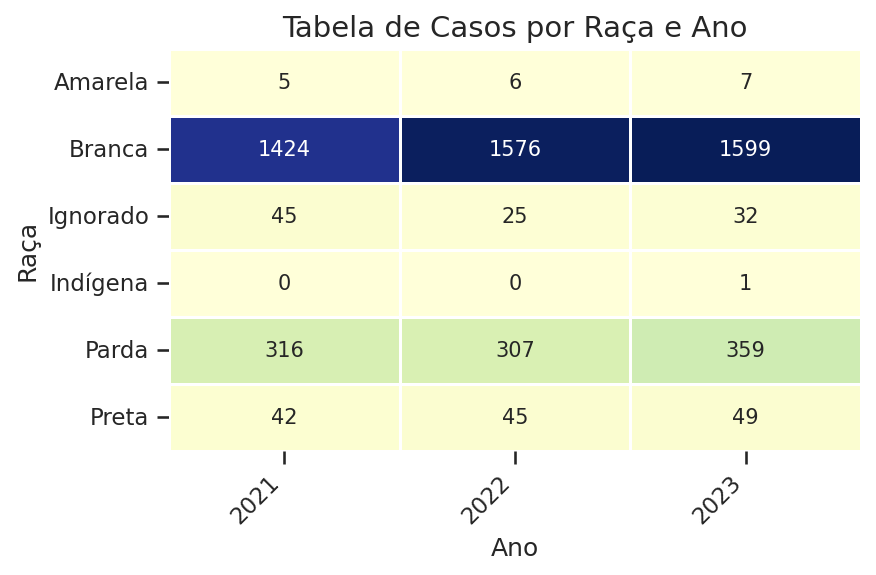

In [96]:
#plota a tabela colorida
plt.figure(figsize=(6, 4))

#usa a coloração com o cmap de 'viridis' para valores
sns.heatmap(table_data, annot=True, fmt='.0f', cmap='YlGnBu', cbar=False, linewidths=0.5, annot_kws={"size": 10})

plt.title("Tabela de Casos por Raça e Ano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Raça", fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
